In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NewtonianInterpolation(object):
    """
    Class of Newtonian Interpolation
    
    Parameters
    ----------
    points : list
        the list of sample points
    """
    
    def __init__(self, points):
        self.points = points
        self.c = self._get_c(points)
    
    def _get_c(self, points):
        """
        Calculation of difference quotient
        """
        
        c = [points[0][1]]
        
        tmp1 = [y for x, y in points]
        for i in range(1, len(points)):
            tmp2 = []
            x = i
            for j in range(1, len(tmp1)):
                tmp2.append((tmp1[j]-tmp1[j-1]) / (points[x][0]-points[j-1][0]))
                x += 1
            tmp1 = copy.deepcopy(tmp2)
            c.append(tmp1[0])
        
        return c
    
    def calc(self, x):
        """
        Calculate the value of a polynomial
        """
        
        l = [x - i for i, j in self.points[:-1]]
        cumpro = [l[0]]
        for i in l[1:]:
            cumpro.append(cumpro[-1]*i)
        
        y = self.c[0]
        for i in range(len(cumpro)):
            y += self.c[i+1] * cumpro[i]
        
        return y
    
    def show_graph(self, 
                   figsize=(15, 7), 
                   x_points=[-10, 10, 100],
                   x_lim=None,
                   y_lim=None,
                   sample_points=True,
                   grid=True,
                   title=''):
        """
        Parameters
        ----------
        figsize : tuple
            default : (15, 7) 
            graph size 
        x_points : list
            default : [-10, 10, 100]
            the values of x you want to plot
            
            [(minimum value), (maximum value), (number of values)]
        x_lim : list
            default : None
            range of x-axis to display

            e.g.
            x=2 ~ x=7 -> [2, 7]
        y_lim : list
            default : None
            range of y-axis to display

            e.g.
            y=-1 ~ y=10 -> [-1, 10]
        sample_points : bool
            True  : display sample points
            False : do not display sample points
        grid : bool
            True  : display grid
            False : do not display grid
        title : str
            default : ''
            title string
        """

        x = np.linspace(x_points[0], x_points[1], x_points[2])

        plt.figure(figsize=figsize)
        plt.plot(x, self.calc(x), label='y=f(x)')

        if sample_points:
            x = [x for x, y in self.points]
            y = [y for x, y in self.points]
            plt.scatter(x, y, label='sample points', c='red', s=100)
        
        if x_lim is not None:
            plt.xlim(x_lim)
        
        if y_lim is not None:
            plt.ylim(y_lim)
        
        if title != '':
            plt.title(title)
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(grid)

In [3]:
points = [[1.5, 0.40547], [1.6, 0.47000], [1.7, 0.53063], [1.8, 0.58779]]

ni = NewtonianInterpolation(points)
x = 1.65
print(f'x={x}, f(x)={ni.calc(x)}')

x=1.65, f(x)=0.500775625


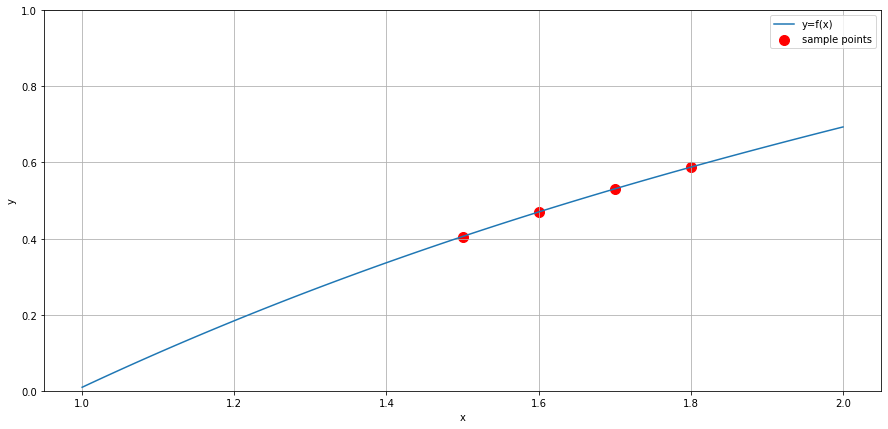

In [4]:
ni.show_graph(x_points=[1, 2, 100], y_lim=[0, 1])